In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\SANKET\Downloads\datasets\covid-19.csv")

In [3]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
2445,2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230
2446,2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469
2447,2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991
2448,2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192


## PREPROCESSING

In [4]:
df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2450 non-null   datetime64[ns]
 1   State/UnionTerritory  2450 non-null   object        
 2   Cured                 2450 non-null   int64         
 3   Deaths                2450 non-null   int64         
 4   Confirmed             2450 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 95.8+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%M-%D")

## ACTIVE CASES

In [11]:
df['Active Cases'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])

In [12]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-01-02,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-03-02,Kerala,0,0,3,3
...,...,...,...,...,...,...
2445,2020-05-29,Tripura,165,0,230,65
2446,2020-05-29,Uttarakhand,79,4,469,386
2447,2020-05-29,Uttar Pradesh,3991,182,6991,2818
2448,2020-05-29,West Bengal,1578,289,4192,2325


## TOP 10 ACTIVE CASES

In [15]:
top_10_active_cases = df.groupby(by = 'State/UnionTerritory').max()[['Active Cases', 'Date']].sort_values(by = 'Active Cases', ascending = False).reset_index()

In [16]:
top_10_active_cases

,State/UnionTerritory,Active Cases,Date
0,Maharashtra,37133,2020-12-05
1,Tamil Nadu,8503,2020-12-05
2,Delhi,7690,2020-12-05
3,Gujarat,6936,2020-12-05
4,Cases being reassigned to states,4332,2020-05-29
5,Rajasthan,3195,2020-12-05
6,Madhya Pradesh,3030,2020-12-05
7,Uttar Pradesh,2818,2020-12-05
8,West Bengal,2325,2020-12-05
9,Bihar,2070,2020-12-05


## TOP 10 DEATH CASES

In [17]:
top_10_death_cases = df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = 'Deaths', ascending = False).reset_index()

In [18]:
top_10_death_cases

,State/UnionTerritory,Deaths,Date
0,Maharashtra,1897,2020-12-05
1,Gujarat,938,2020-12-05
2,Madhya Pradesh,313,2020-12-05
3,Delhi,303,2020-12-05
4,West Bengal,289,2020-12-05
5,Uttar Pradesh,182,2020-12-05
6,Rajasthan,173,2020-12-05
7,Tamil Nadu,133,2020-12-05
8,Telengana,63,2020-12-05
9,Andhra Pradesh,58,2020-12-05


## PIE CHART FOR TOP 15 ACTIVE CASES

([<matplotlib.patches.Wedge at 0x2a167e13890>,
 [Text(0.20597458370947436, 1.0805435997060502, 'Maharashtra'),
  Text(-1.098009865886141, 0.06613875124840671, 'Tamil Nadu'),
  Text(-0.9419540709006866, -0.5680867260494867, 'Delhi'),
  Text(-0.511456162558573, -0.9738647718142693, 'Gujarat'),
  Text(-0.07045084588492309, -1.0977416263921576, 'Cases being reassigned to states'),
  Text(0.23590144020519668, -1.0744070506605559, 'Rajasthan'),
  Text(0.47636805290510176, -0.9915006193499842, 'Madhya Pradesh'),
  Text(0.6792875399593684, -0.8651984963324599, 'Uttar Pradesh'),
  Text(0.8315232710051045, -0.7201173861093563, 'West Bengal'),
  Text(0.9377196372636497, -0.5750494603859126, 'Bihar'),
  Text(1.0091239086860508, -0.43780011068772845, 'Punjab'),
  Text(1.0551807598265381, -0.3107950515884858, 'Karnataka'),
  Text(1.0814043136244724, -0.20140682827149614, 'Andhra Pradesh'),
  Text(1.0942526214214001, -0.11229960156828003, 'Jammu and Kashmir'),
  Text(1.0994453862575377, -0.0349262456

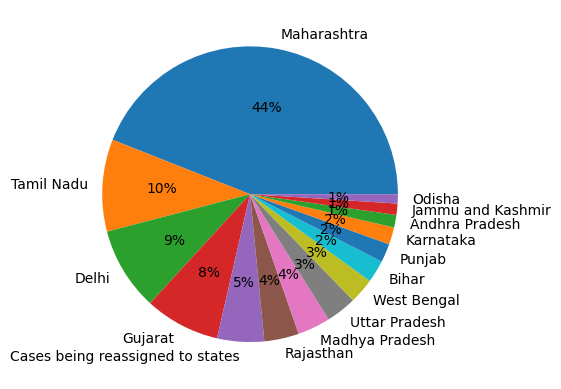

In [21]:
plt.pie(data = top_10_active_cases.iloc[:15], autopct = '%.0f%%', x = 'Active Cases', labels = 'State/UnionTerritory')

## BAR PLOT FOR TOP 15 ACTIVE CASES

<Axes: xlabel='Active Cases', ylabel='State/UnionTerritory'>

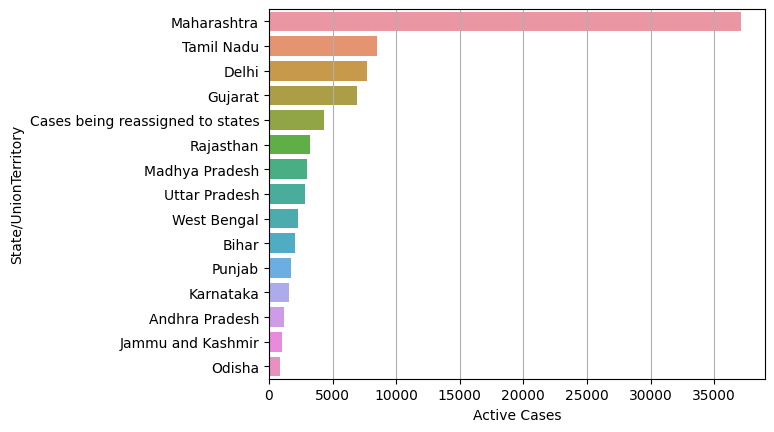

In [33]:
plt.grid()
sns.barplot(data = top_10_active_cases.iloc[:15], x = 'Active Cases', y = 'State/UnionTerritory')

## LINE PLOT FOR TOP 10 DEATH CASES

<Axes: xlabel='Deaths', ylabel='State/UnionTerritory'>

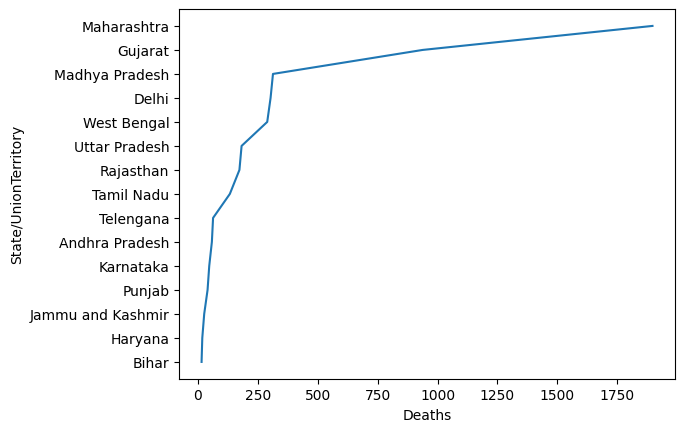

In [24]:
sns.lineplot(data = top_10_death_cases.iloc[:15], x = 'Deaths', y = 'State/UnionTerritory')

## FATALITY RATIO

In [27]:
df['Fatality Ratio'] = df['Deaths']*100/df['Confirmed']

In [28]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases,Fatality Ratio
0,2020-01-30,Kerala,0,0,1,1,0.000000
1,2020-01-31,Kerala,0,0,1,1,0.000000
2,2020-01-02,Kerala,0,0,2,2,0.000000
3,2020-02-02,Kerala,0,0,3,3,0.000000
4,2020-03-02,Kerala,0,0,3,3,0.000000
...,...,...,...,...,...,...,...
2445,2020-05-29,Tripura,165,0,230,65,0.000000
2446,2020-05-29,Uttarakhand,79,4,469,386,0.852878
2447,2020-05-29,Uttar Pradesh,3991,182,6991,2818,2.603347
2448,2020-05-29,West Bengal,1578,289,4192,2325,6.894084


In [32]:
df.groupby(by = 'State/UnionTerritory').max()[['Fatality Ratio']].sort_values(by = 'Fatality Ratio', ascending = False)

,Fatality Ratio
State/UnionTerritory,
Bihar,50.000000
Punjab,50.000000
Himachal Pradesh,33.333333
Karnataka,16.666667
Delhi,14.285714
Meghalaya,14.285714
West Bengal,11.111111
Jharkhand,10.526316
Gujarat,9.523810


## TOP 5 AFFECTED STATES

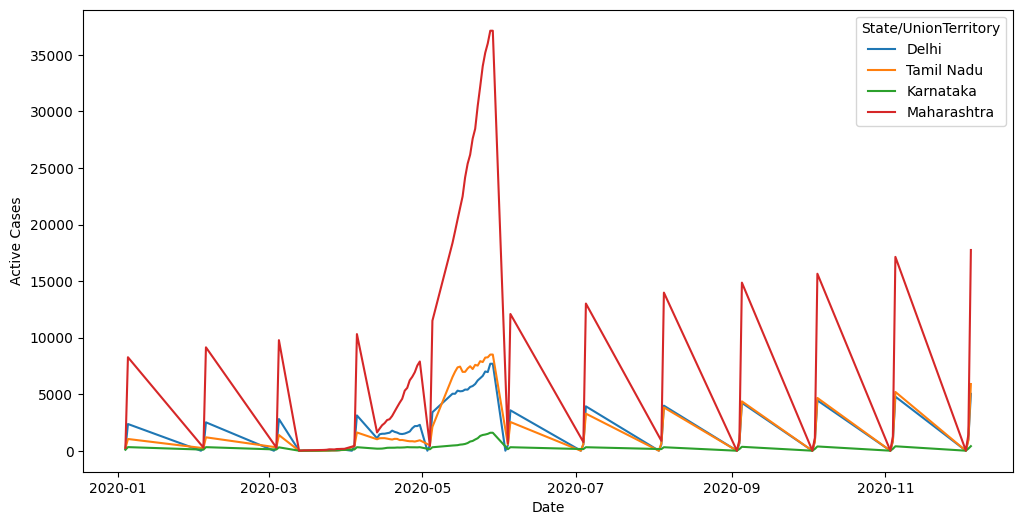

In [39]:
plt.figure(figsize=  (12, 6))
top_5 = sns.lineplot(data = df[df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Tamil Nadu', "Delhi"])], x = 'Date', y = 'Active Cases', hue = 'State/UnionTerritory')